## Energy Balance - Explorador glacier - Patagonia

## import packages

In [1]:
import pandas as pd
import numpy as np

#### read data

In [2]:
csv_path = r"C:\Users\pauls\Desktop\MSc_WaterResources\2022\2022-2\Glaciologia\Tareas\T3\exploradores2017.csv"
raw_data = pd.read_csv(csv_path, parse_dates = [["Date","Hour"]])
raw_data = raw_data.set_index("Date_Hour")
raw_data

,SW_in(W/m²),SW_out(W/m²),LW_in(W/m²),LW_out(W/m²),wind_speed(m/s),wind_direction(degrees),air_temperature(degrees_Celsius),atmospheric_pressure(hPa)
Date_Hour,,,,,,,,
2017-01-01 00:00:00,-1.623,1.524,330.5,354.8,7.925,246.8,8.17,989
2017-01-01 01:00:00,-1.607,0.884,336.2,355.5,6.882,345.6,8.49,990
2017-01-01 02:00:00,-1.595,0.587,349.5,356.4,6.864,343.7,9.04,990
2017-01-01 03:00:00,-1.834,0.530,343.1,357.4,7.006,338.3,9.54,990
2017-01-01 04:00:00,-2.934,0.715,362.3,357.2,5.603,343.3,8.98,990
...,...,...,...,...,...,...,...,...
2017-03-31 19:00:00,91.100,21.430,358.8,353.3,1.510,230.9,10.35,1000
2017-03-31 20:00:00,16.630,2.588,350.0,351.6,1.357,207.5,10.39,1001
2017-03-31 21:00:00,0.661,-1.388,370.4,349.6,1.336,176.3,8.54,1001


## 1.- Calculo promedio de los cuatro componentes del balance energético superficial

### Filtrado de datos

Primero que todo es necesario chequear que todas las componentes del balance superficial (a excepción de la temperatura) sean mayores a 0. 
Arbitrariamente se decidió eliminar la medición completa (todas las variables) si alguno de estos valores es negativo.

In [3]:
result = []

for i in range(len(raw_data)):
    for j in range(len(raw_data.columns)):
        if raw_data.iloc[i,j] < 0:
            result.append(j)
            
result
count = np.bincount(result)
count

array([467, 440,   0,   0,   0,   0,   8], dtype=int64)

Los resultados anteriores nos muestran que existen valores negativos anómalos en los datos de radiación de onda corta entrante (columna 0) y saliente (columna 1).

In [4]:
for i in range(len(raw_data)):
    if raw_data.iloc[i,0] < 0:
        raw_data.iloc[i,:] = np.nan
    elif raw_data.iloc[i,1] < 0:
        raw_data.iloc[i,:] = np.nan

#raw_data

#### Variables

In [5]:
raw_data["SW_neto(W/m²)"] = raw_data["SW_in(W/m²)"]-raw_data["SW_out(W/m²)"]
raw_data["LW_neto(W/m²)"] = raw_data["LW_in(W/m²)"]-raw_data["LW_out(W/m²)"]
#raw_data

Es necesario volver a chequear en la onda corta si existen valores negativos y filtrarlos

In [6]:
result = []

for i in range(len(raw_data)):
        if raw_data.iloc[i,8] < 0:
            result.append(1)
            raw_data.iloc[i,:] = np.nan
            
sum(result)

58

#### 1.1.- Short and long waves net

In [7]:
sw_neto_mean = raw_data["SW_neto(W/m²)"].mean()
lw_neto_mean = raw_data["LW_neto(W/m²)"].mean()

print("SW: ",sw_neto_mean,"W/m2")
print("LW: ",lw_neto_mean,"W/m2")

SW:  227.3318655332303 W/m2
LW:  4.595749613601235 W/m2


#### Flujo turbulento de calor sensible

Calculamos el calor sensible considerando el coeficiente de transferencia C* igual a 0.002 (Hogg et al., 1982) y Ts = 0°C.

In [8]:
raw_data["SH(W/m²)"] = 0.0129*0.002*raw_data["atmospheric_pressure(hPa)"]*100*raw_data["wind_speed(m/s)"]*raw_data["air_temperature(degrees_Celsius)"]
sh_neto_mean = raw_data["SH(W/m²)"].mean()
print("SH: ", sh_neto_mean.mean(), "W/m2")

SH:  96.2076618857254 W/m2


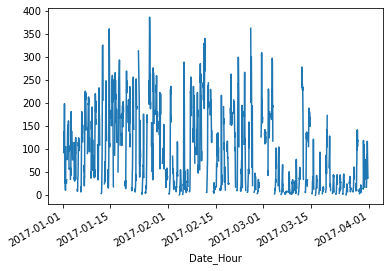

In [9]:
raw_data["SH(W/m²)"].plot();

#### Flujo turbulento de calor latente

El flujo turbulento de calor latente requiere de mayor información, se asumen algunos valores como:

In [10]:
pa = 1.29
Lv = 2.5*10**6
#Ls =28.3*10**5
C = 0.002
es = 611
po = 101300

Ahora es necesario calcular vapor pressure at saturation del hielo en función de la temperatura

In [11]:
raw_data["e(Pa)"] = 0.87*2.38*10**11*(2.718**(-5400/(raw_data["air_temperature(degrees_Celsius)"]+273.15)))

In [12]:
raw_data["LH(W/m²)"] = 0.622*pa*Lv*C*raw_data["wind_speed(m/s)"]*(raw_data["e(Pa)"]-es)/po
lh_neto_mean = raw_data["LH(W/m²)"].mean()
print("LH: ",lh_neto_mean, "W/m2")

LH:  74.06671328038887 W/m2


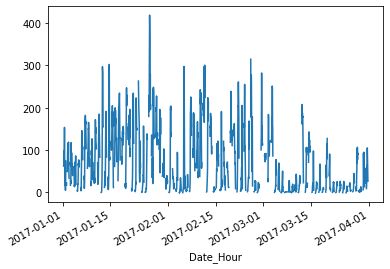

In [13]:
raw_data["LH(W/m²)"].plot();

## 3.- Albedo

#### Cálculo de albedo con todos los datos

In [14]:
raw_data["albedo"] = -(raw_data["SW_neto(W/m²)"]/raw_data["SW_in(W/m²)"])+1
albedo = raw_data["albedo"].mean()
albedo

0.2161764871821161

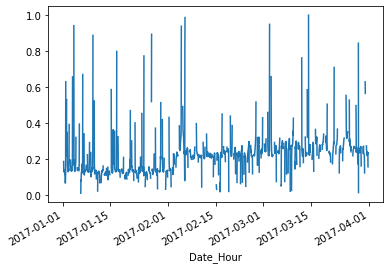

In [15]:
raw_data["albedo"].plot();

#### Cálculo de albedo solo entre 10-15 hrs

In [16]:
raw_data["albedo'"] =  raw_data["albedo"]
for i in range(len(raw_data)):
    if raw_data.index[i].hour >= 10 and raw_data.index[i].hour <= 15:
        raw_data["albedo'"][i] = -(raw_data["SW_neto(W/m²)"][i]/raw_data["SW_in(W/m²)"][i])+1
    else:
        raw_data["albedo'"][i] = np.nan

print("albedo': ", raw_data["albedo'"].mean())

albedo':  0.2033421129993818


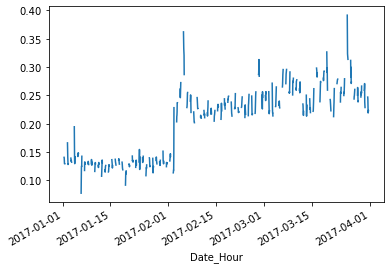

In [17]:
raw_data["albedo'"].plot();

In [18]:
raw_data.describe()

,SW_in(W/m²),SW_out(W/m²),LW_in(W/m²),LW_out(W/m²),wind_speed(m/s),wind_direction(degrees),air_temperature(degrees_Celsius),atmospheric_pressure(hPa),SW_neto(W/m²),LW_neto(W/m²),SH(W/m²),e(Pa),LH(W/m²),albedo,albedo'
count,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,528.000000
mean,284.147050,56.815185,359.970943,355.375193,3.713927,237.603563,8.481390,991.036321,227.331866,4.595750,96.207662,1004.546907,74.066713,0.216176,0.203342
std,281.603023,60.084721,24.523512,9.347596,2.584508,72.720509,3.677082,6.445518,228.554193,22.179049,84.625905,254.508704,74.221650,0.112903,0.061719
min,0.191000,0.010000,281.900000,332.500000,0.099000,27.270000,-0.835000,968.000000,0.003000,-63.200000,-0.841857,506.920500,-1.857032,0.008977,0.077007
25%,50.755000,9.885000,346.000000,348.700000,1.287500,175.100000,5.667000,988.000000,40.782500,-10.350000,18.935742,804.918015,10.977783,0.133560,0.133358
50%,192.200000,36.115000,363.100000,354.700000,3.087500,226.450000,8.465000,992.000000,154.080000,10.100000,71.661636,975.692711,47.768307,0.218806,0.222300
75%,442.750000,85.975000,375.925000,361.575000,5.949500,316.675000,11.167500,995.000000,354.050000,20.175000,161.056350,1170.741326,121.440066,0.255258,0.249355
max,1214.000000,293.700000,421.000000,394.900000,11.080000,347.300000,19.150000,1005.000000,1057.500000,53.300000,386.350860,1966.517619,418.585288,0.997425,0.391232


## 3.- Estimación derretimiento

Primero que todo se asume que la temperatura superficial del glaciar está en el punto de fusión.

In [26]:
dw = 1000
lf = 3.34*10**5
melt = (sw_neto_mean+lw_neto_mean+sh_neto_mean+lh_neto_mean)/(dw*lf)
print(melt*86400*(31+28+31),"m/s")

9.363840349321755 m/s


In [20]:
sw_neto_mean+lw_neto_mean+sh_neto_mean+lh_neto_mean

402.2019903129458

In [21]:
raw_data.to_excel("exploradores_full.xlsx")